# **데이터시각화_과제1_19013227_박민지**

In [1]:
#io와 pandas 모듈 import
import io
import pandas as pd

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

In [4]:
# 한글 깨짐1
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 한글 깨짐 2
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get install fonts-nanum*
!apt-get install fonts-woowa-hanna

NANUM_GOTHIC = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
/usr/share/fonts/truetype/nanum/NanumGothic.ttf

fm._rebuild()

plt.rc('font', family=NANUM_GOTHIC.get_name())

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-woowa-hanna is already the newest version (1.000-2).
The following pac

FileNotFoundError: ignored

</br></br></br></br>

**1. 지하철 호선별 공기질 측정 정보**


In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/세종대학교/2022-2/데이터시각화/data/서울교통공사_전동차 공기질 측정 정보_20181231.csv'


In [ ]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename, encoding= 'CP949')
data.head()

,호선,미세먼지(PM10),이산화탄소(혼잡시),이산화탄소(비혼잡시)
0,1,39.0,1431,1179
1,2,49.5,1486,1001
2,3,48.5,1631,1435
3,4,44.0,1425,976
4,5,65.1,1078,808


In [ ]:
data.info

<bound method DataFrame.info of    호선  미세먼지(PM10)  이산화탄소(혼잡시)  이산화탄소(비혼잡시)
0   1        39.0        1431         1179
1   2        49.5        1486         1001
2   3        48.5        1631         1435
3   4        44.0        1425          976
4   5        65.1        1078          808
5   6        69.0        1435          801
6   7        26.2        1710         1032
7   8        33.1        1556         1033>

In [ ]:
confusion = []
not_confusion = []
fine_dust = []
line=[1,2,3,4,5,6,7,8]

confusion = data['이산화탄소(혼잡시)']
print(confusion)

not_confusion = data['이산화탄소(비혼잡시)']
print(not_confusion)

fine_dust = data['미세먼지(PM10)']
print(fine_dust)



0    1431
1    1486
2    1631
3    1425
4    1078
5    1435
6    1710
7    1556
Name: 이산화탄소(혼잡시), dtype: int64
0    1179
1    1001
2    1435
3     976
4     808
5     801
6    1032
7    1033
Name: 이산화탄소(비혼잡시), dtype: int64
0    39.0
1    49.5
2    48.5
3    44.0
4    65.1
5    69.0
6    26.2
7    33.1
Name: 미세먼지(PM10), dtype: float64


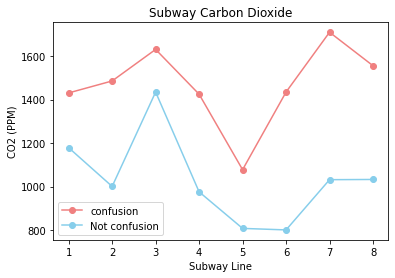

In [ ]:
# 그래프를 그릴 도화지 준비하기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# x축에 년도, y축에 인구수가 있는 선 그래프 만들기
plt.plot(line, confusion, color='lightcoral', marker='o', linestyle='solid', label='Confusion')
plt.plot(line, not_confusion, color='skyblue', marker='o', linestyle='solid', label='Not Confusion')

# 제목 더하기
plt.title("Subway Carbon Dioxide")

# x,y축에 레이블 추가하기
plt.ylabel("CO2 (PPM)")
plt.xlabel("Subway Line")


# 보여주기
plt.legend()
plt.show()


<br/><br/><br/><br/>





**2. 지역별 전기차 현황정보**

In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/세종대학교/2022-2/데이터시각화/data/한국전력공사_지역별 전기차 현황정보.csv'


In [ ]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename)
data.head()

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주
0,2018,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549
1,2019,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178
2,2020,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699


In [ ]:
data.info

<bound method DataFrame.info of     기준일    부산     대구    대전    광주     경기    강원    경북    경남    충북    충남    전북  \
0  2018  1567   6605  1334  1447   6383  1377  2001  2107  1199  1127   997   
1  2019  3216  11313  2555  2464  11750  2445  4051  3626  2412  2841  1841   
2  2020  4320  12468  3338  3046  17197  3091  5400  5003  3319  4252  2906   

     전남    세종     서울    인천    울산     제주  
0  1974   394   9564  1284   847  15549  
1  3326   903  14952  2598  1447  18178  
2  4576  1076  20997  4204  2142  20699  >

In [ ]:
city=data.transpose()
city.rename(columns=city.iloc[0],inplace=True)
city=city.drop(city.index[0])
city

,2018,2019,2020
부산,1567,3216,4320
대구,6605,11313,12468
대전,1334,2555,3338
광주,1447,2464,3046
경기,6383,11750,17197
강원,1377,2445,3091
경북,2001,4051,5400
경남,2107,3626,5003
충북,1199,2412,3319
충남,1127,2841,4252


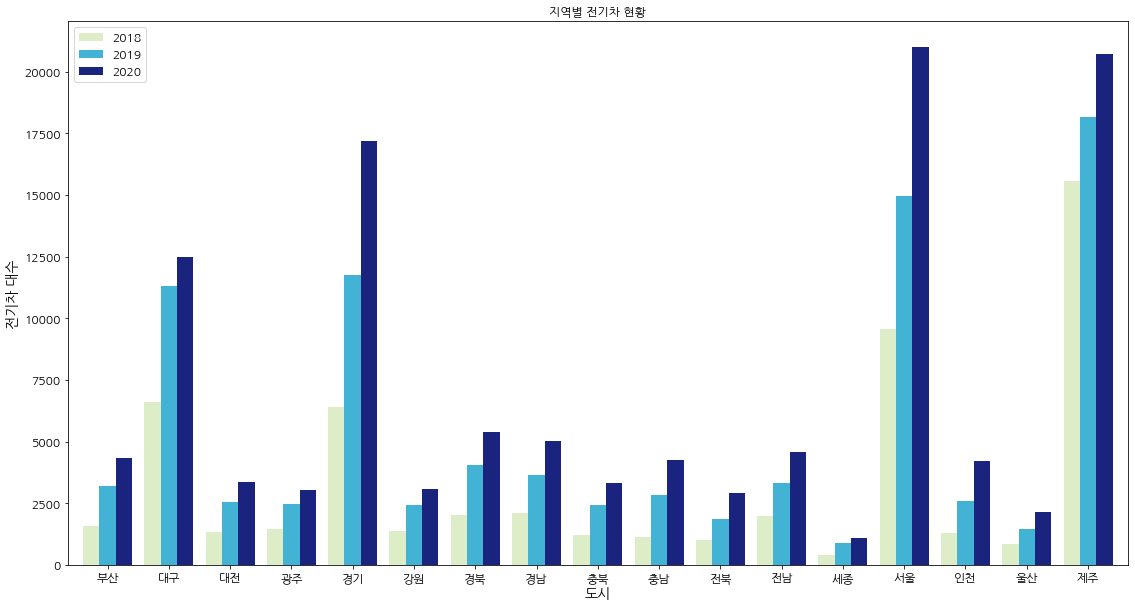

In [ ]:
ax = city.plot(kind='bar', title='지역별 전기차 현황', figsize=(19, 10), legend=True, fontsize=12, rot=0, color=['#DCEDC8','#42B3D5','#1A237E'], width=0.8)

ax.set_xlabel('도시', fontsize=14)          # x축 정보 표시
ax.set_ylabel('전기차 대수', fontsize=14)     # y축 정보 표시


ax.legend(['2018', '2019','2020'], fontsize=12)    # 범례 지정

<br/><br/><br/><br/>





**3. 지하철 호선별 하차 인원 정보**

In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/세종대학교/2022-2/데이터시각화/data/CARD_SUBWAY_MONTH_202208.csv'


In [ ]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename)
data.head()

,노선명,역명,승차총승객수,하차총승객수
0,중앙선,도심,2143,1636
1,경원선,도봉,5251,5113
2,경원선,도봉산,6175,3864
3,경원선,망월사,6680,6759
4,경원선,회룡,10851,10795


In [ ]:
data['노선명'].unique()

array(['중앙선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선', '분당선', '수인선',
       '신림선', '안산선', '우이신설선', '일산선', '장항선', '1호선', '2호선', '7호선', '3호선',
       '4호선', '5호선', '6호선', '8호선', '9호선', '9호선2~3단계', '경강선', '경부선'],
      dtype=object)

In [ ]:
data=data.replace({'노선명':'9호선2~3단계'},'9호선')

filter = data['노선명'].str.endswith('호선') & ~data['노선명'].str.contains('공항철도')
data = data[filter]

data['노선명'].unique()

array(['1호선', '2호선', '7호선', '3호선', '4호선', '5호선', '6호선', '8호선', '9호선'],
      dtype=object)

In [ ]:
data['ratio'] = data['하차총승객수'] / data['승차총승객수']
data.head()

,노선명,역명,승차총승객수,하차총승객수,ratio
218,1호선,서울역,47711,45432,0.952233
219,1호선,시청,21830,22357,1.024141
220,1호선,종각,35945,35727,0.993935
221,1호선,종로3가,19983,18539,0.927739
222,1호선,종로5가,18002,18063,1.003389


In [ ]:
# 이상치 제거

fil=data[data['ratio']==0 ].index
data=data.drop(fil)

fil=data[data['ratio'] > 2.0 ].index
result=data.drop(fil)


In [ ]:
# 오름차순으로 정렬

result=result.sort_values('노선명')
result

,노선명,역명,승차총승객수,하차총승객수,ratio
218,1호선,서울역,47711,45432,0.952233
12084,1호선,종각,21052,19999,0.949981
12083,1호선,종로3가,22999,21905,0.952433
12082,1호선,종로5가,18918,18704,0.988688
16967,1호선,동대문,10914,10390,0.951988
...,...,...,...,...,...
13961,9호선,신목동,4480,3936,0.878571
13960,9호선,선유도,9401,8788,0.934794
13959,9호선,당산,19239,19395,1.008109
13971,9호선,개화,2926,2019,0.690021


In [ ]:
result.groupby('노선명').mean()

,승차총승객수,하차총승객수,ratio
노선명,,,
1호선,20188.832258,19793.206452,0.984996
2호선,23957.598710,24286.769677,1.018022
3호선,13606.146628,13547.980450,0.992082
4호선,16126.411543,16280.027604,1.015811
5호선,9975.972350,9925.396313,0.996443
6호선,7751.800349,7653.428073,0.985235
7호선,12120.657450,11906.019969,0.970632
8호선,9032.243728,9097.326165,1.005738
9호선,8789.647109,8809.104592,0.990764


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.7% of the points cannot be placed; y

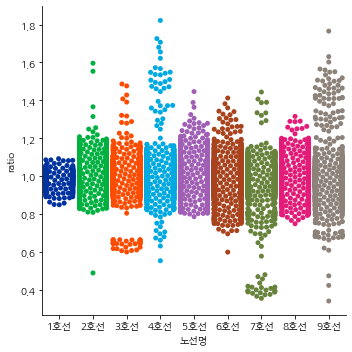

In [ ]:
import seaborn as sns

colors = ["#0032A0", "#00B140","#FC4C02", "#00A9E0","#A05EB5", "#A9431E","#67823A", "#E31C79","#8C8279"]
sns.set_palette(sns.color_palette(colors))

sns.catplot(x='노선명', y='ratio', kind='swarm', data=result)


<br/><br/><br/><br/>





**4. 요일별 교통사고 통계**

In [5]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/세종대학교/2022-2/데이터시각화/data/도로교통공단_요일별 교통사고 통계_20211231.csv'


In [6]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename, encoding= 'cp949')
data.head()

,요일,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,일,21812,347,6330,25493,2042
1,월,29468,454,8255,31305,2218
2,화,29753,454,8215,30980,2262
3,수,30286,416,8220,31770,2458
4,목,29974,464,8120,31078,2265


In [7]:
data.info

<bound method DataFrame.info of   요일   사고건수  사망자수  중상자수   경상자수  부상신고자수
0  일  21812   347  6330  25493    2042
1  월  29468   454  8255  31305    2218
2  화  29753   454  8215  30980    2262
3  수  30286   416  8220  31770    2458
4  목  29974   464  8120  31078    2265
5  금  33015   440  8796  35074    2644
6  토  28822   378  7969  33583    2531>

In [8]:
week=data['요일']
dead=data['사망자수']
injured_a=data['중상자수']
injured_b=data['경상자수']
injured_c=data['부상신고자수']

print(week,dead,injured_a,injured_b,injured_c)

0    일
1    월
2    화
3    수
4    목
5    금
6    토
Name: 요일, dtype: object 0    347
1    454
2    454
3    416
4    464
5    440
6    378
Name: 사망자수, dtype: int64 0    6330
1    8255
2    8215
3    8220
4    8120
5    8796
6    7969
Name: 중상자수, dtype: int64 0    25493
1    31305
2    30980
3    31770
4    31078
5    35074
6    33583
Name: 경상자수, dtype: int64 0    2042
1    2218
2    2262
3    2458
4    2265
5    2644
6    2531
Name: 부상신고자수, dtype: int64


In [9]:
result=[week,dead,injured_a,injured_b,injured_c]

In [10]:
# 누적 그래프 시작값 설정

import numpy as np

b_bottom=np.add(dead,injured_a)
c_bottom=np.add(injured_a,injured_b)

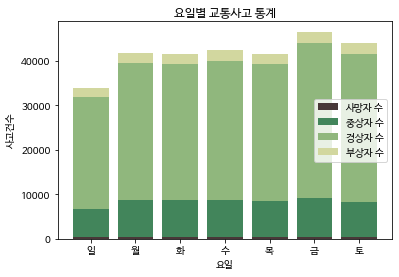

In [11]:
# 누적 그래프

plt.bar(week,dead, color='#483838')
plt.bar(week,injured_a,bottom=dead,color='#42855B')
plt.bar(week,injured_b,bottom=b_bottom,color='#90B77D')
plt.bar(week,injured_c,bottom=c_bottom,color='#D2D79F')

# legend 설정
plt.legend(['사망자 수', '중상자 수', '경상자 수','부상자 수'])

plt.title('요일별 교통사고 통계')
plt.xlabel('요일')
plt.ylabel('사고건수')

plt.show()

<br/><br/><br/><br/>





**5. 서울특별시_동대문구_행정동별_코로나19확진자수**

In [13]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/세종대학교/2022-2/데이터시각화/data/서울특별시_동대문구_행정동별_코로나19확진자수.csv'


In [14]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename, encoding= 'CP949')
data.head()

,행정동,확진자 수
0,용신동,12310
1,이문동,14021
2,장안동,27479
3,전농동,17390
4,답십리동,22115


In [32]:
data=data.sort_values('확진자 수',ascending=False)
data

,행정동,확진자 수
2,장안동,27479
4,답십리동,22115
3,전농동,17390
8,휘경동,14710
1,이문동,14021
0,용신동,12310
5,제기동,8458
6,청량리동,5872
7,회기동,4042
9,기타,30


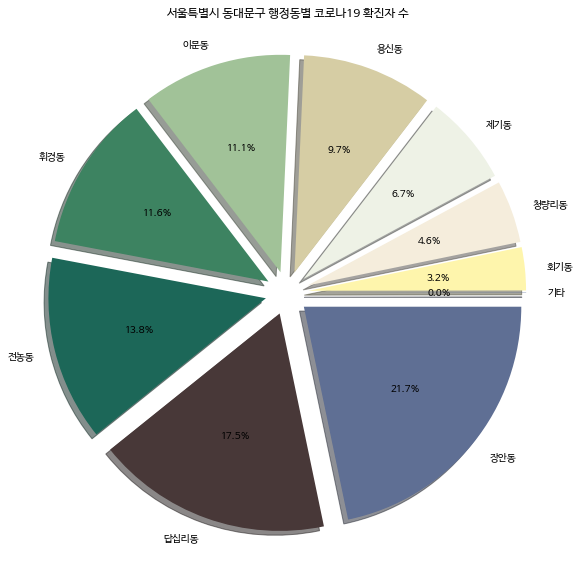

In [63]:
import matplotlib.pyplot as plt

ratio = data['확진자 수']
labels = data['행정동']
explode = [0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1]
colors = ['#5F6F94','#483838','#1C6758', '#3D8361','#A1C298','#D6CDA4', '#EEF2E6','#F5EDDC','#FEF5AC']

plt.figure(figsize=(10,10))
plt.title('서울특별시 동대문구 행정동별 코로나19 확진자 수')
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()